In [2]:
#Import Dependencies
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
# Read the csv file into a pandas DataFrame

wwine = pd.read_csv('winequality-white.csv', sep = ';')
wwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [52]:
# Define x and y
X = wwine.drop(['quality'], axis=1)
y = wwine['quality']

# Splitting X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

In [53]:
# Linear Regression Model
model = LinearRegression()

# fit the model to the training data (learn the coefficients)

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
# make predictions on the testing set
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
r2score = model.score(X_test, y_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))

#A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 0.5511819533828091
R-squared (R2 ): 0.28810677158350273
Root Mean Squared Error (RMSE): 0.7424162938559532


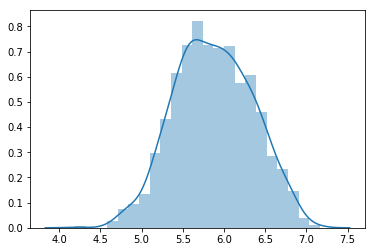

In [55]:
import seaborn as sb
import matplotlib.pyplot as plt
ax = sb.distplot(predicted)
plt.show()

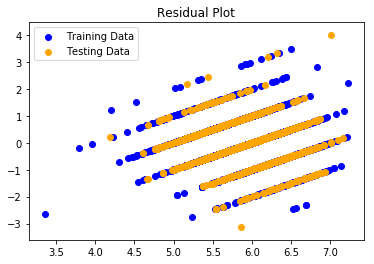

In [56]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.title("Residual Plot")
plt.show()

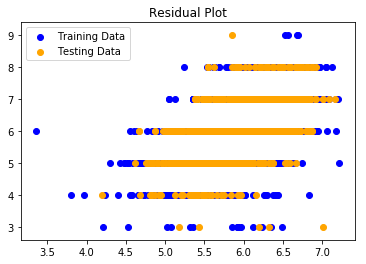

In [59]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.clf()
plt.scatter(model.predict(X_train), y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test, c="orange", label="Testing Data")
plt.legend()
plt.title("Residual Plot")
plt.show()

In [60]:
import statsmodels.api as sm

C:\Users\vahoang\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [69]:
data = sm.add_constant(X, prepend=False)

# Fit and summarize OLS model
mod = sm.OLS(y, X)

res = mod.fit()

print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 2.707e+04
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:26:59   Log-Likelihood:                -5575.5
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4887   BIC:                         1.124e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.0506 